In [1]:
import os
import pathlib
#import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [2]:
# Set Parameters
num_classes = 100
batch_size = 64
img_height = 224
img_width = 224


# Keras data loader
# training, validation and test set
TRAIN_PATH = pathlib.Path("../input/sports-classification/train")
VAL_PATH = pathlib.Path("../input/sports-classification/valid")
TEST_PATH = pathlib.Path("../input/sports-classification/test")

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 13572 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


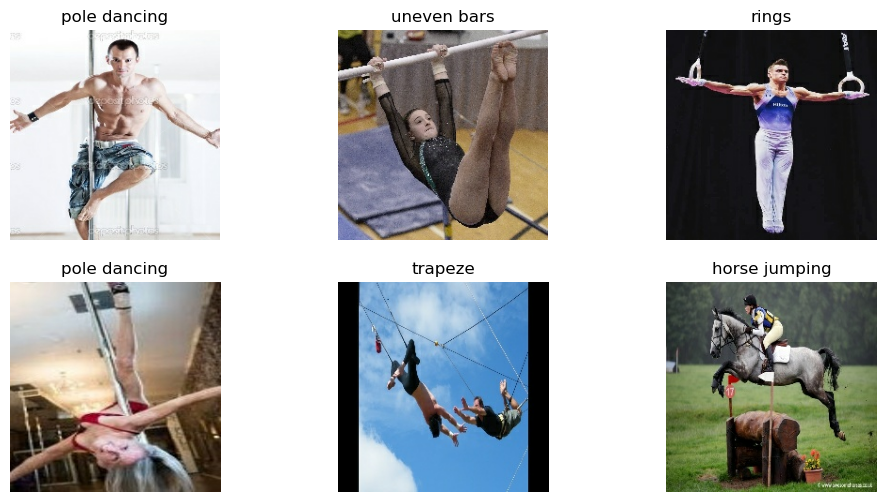

In [3]:
class_names = train_ds.class_names
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
model1 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

# setting hyperparameters
model1.compile(optimizer='adam', # set the optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function
    metrics=['accuracy']) #accuracy metric
history = model1.fit(train_ds,epochs=10, validation_data=val_ds)
print("PERFOMANCE",model1.evaluate(test_ds))
model1.summary()

Epoch 1/10
213/213 [==============================] - 3309s 16s/step - loss: 4.4740 - accuracy: 0.0266 - val_loss: 4.1956 - val_accuracy: 0.0500
Epoch 2/10
213/213 [==============================] - 3311s 16s/step - loss: 3.7699 - accuracy: 0.1131 - val_loss: 3.5072 - val_accuracy: 0.1880
Epoch 3/10
213/213 [==============================] - 3301s 15s/step - loss: 2.9935 - accuracy: 0.2515 - val_loss: 2.8298 - val_accuracy: 0.2960
Epoch 4/10
213/213 [==============================] - 3327s 16s/step - loss: 2.4367 - accuracy: 0.3677 - val_loss: 2.4555 - val_accuracy: 0.3600
Epoch 5/10
213/213 [==============================] - 3338s 16s/step - loss: 1.9398 - accuracy: 0.4777 - val_loss: 2.3163 - val_accuracy: 0.4160
Epoch 6/10
213/213 [==============================] - 3336s 16s/step - loss: 1.5245 - accuracy: 0.5699 - val_loss: 2.5248 - val_accuracy: 0.3980
Epoch 7/10
213/213 [==============================] - 3345s 16s/step - loss: 1.0853 - accuracy: 0.6846 - val_loss: 2.6589 - val_ac

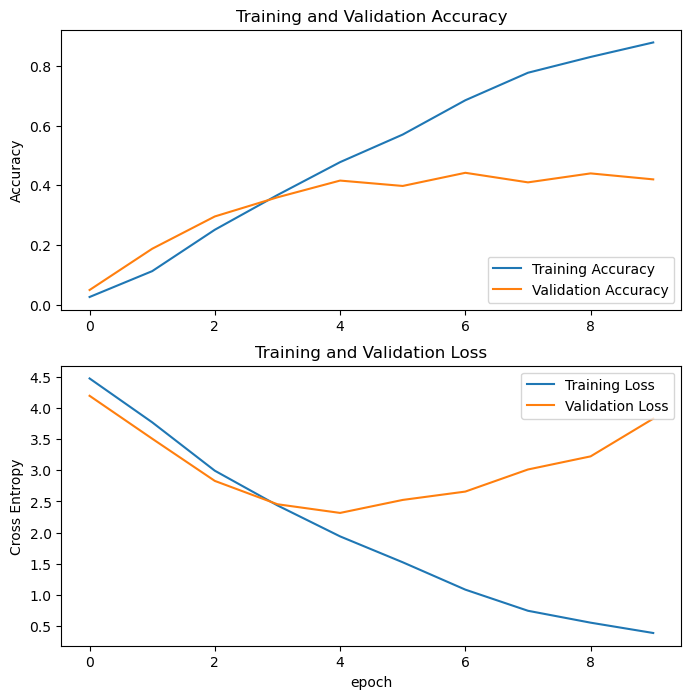

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()